## Observations and Insights 

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete=pd.merge(mouse_metadata,study_results , how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()






249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_data_complete[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]




#no_duplicates_complete=study_data_complete.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='last')
#no_duplicates_complete




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 






In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete.duplicated(subset=["Mouse ID","Timepoint"])

no_duplicates_complete=study_data_complete.drop_duplicates(["Mouse ID","Timepoint"])


no_duplicates_complete.head(30)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.


no_duplicates_complete["Mouse ID"].nunique()


249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumorvoulume=no_duplicates_complete["Tumor Volume (mm3)"].mean()

print(mean_tumorvoulume)

median_tumorvoulume=no_duplicates_complete["Tumor Volume (mm3)"].median()

print(median_tumorvoulume)

variance_tumorvoulume=no_duplicates_complete["Tumor Volume (mm3)"].var()

print(variance_tumorvoulume)                                
strd_tumorvoulume=no_duplicates_complete["Tumor Volume (mm3)"].std()

print(strd_tumorvoulume) 

sem_tumorvoulume=no_duplicates_complete["Tumor Volume (mm3)"].sem()

print(sem_tumorvoulume)

                                 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_by_regimine=no_duplicates_complete.groupby("Drug Regimen")


tumor_volume=grouped_by_regimine["Tumor Volume (mm3)"]


tumor_volume.describe()


var_by_regimen=tumor_volume.var()
mean_by_regimen=tumor_volume.mean()
meadian_by_regimen=tumor_volume.median()
std_by_regimen=tumor_volume.std()
sem_by_regimen=tumor_volume.sem()



summary_data_byregimen=pd.DataFrame({"Mean": mean_by_regimen,
                         "Median": meadian_by_regimen,
                         "Standard Deviation":std_by_regimen,       
                         "Variance":var_by_regimen,
                         "Standard Error":sem_by_regimen
                        
                        })

# Assemble the resulting series into a single summary dataframe.
summary_data_byregimen


50.449276454131365
48.951421075
79.29127745388136
8.904564978362579
0.2049329125626731


,Mean,Median,Standard Deviation,Variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



summary_stats=no_duplicates_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

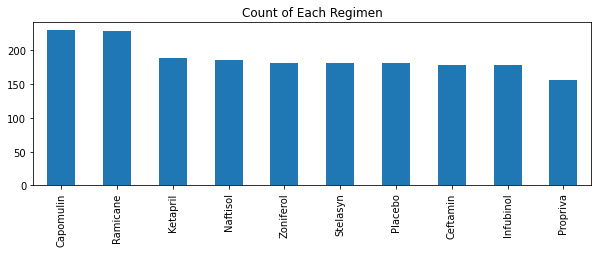

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



#grouped_by_regimine.plot(kind="bar",figsize=(20,3))

#state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart


#plt.show()
#plt.tight_layout()



no_duplicates_complete["Drug Regimen"].value_counts().plot(kind="bar",figsize=(10,3))

plt.title("Count of Each Regimen")

plt.show()
plt.tight_layout()

In [11]:
no_duplicates_complete["Drug Regimen"]

0       Ramicane
1       Ramicane
2       Ramicane
3       Ramicane
4       Ramicane
          ...   
1888    Naftisol
1889    Naftisol
1890    Naftisol
1891    Naftisol
1892    Naftisol
Name: Drug Regimen, Length: 1888, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

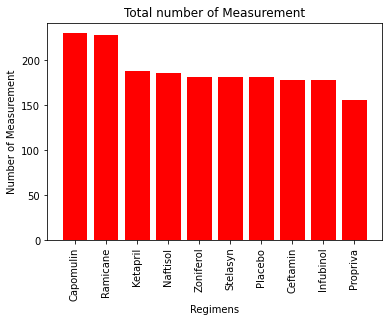

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

value_count=no_duplicates_complete["Drug Regimen"].value_counts()



plt.bar(value_count.index.values,value_count.values,color="r", align="center" )




plt.title("Total number of Measurement")
plt.xlabel("Regimens")
plt.ylabel("Number of Measurement")

plt.xticks(rotation=90)






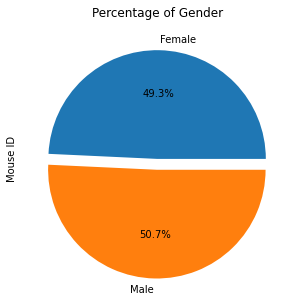

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_bygender=no_duplicates_complete.groupby("Sex")

gender_ID_df=grouped_bygender.count()

gender_ID=gender_ID_df["Mouse ID"]

gender_ID.plot.pie(y=gender_ID.index.values,title="Percentage of Gender",autopct='%1.1f%%',startangle=0,explode=(0, 0.1),figsize=(5, 5))



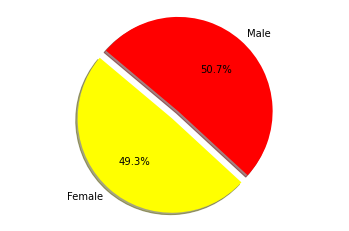

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_bygender=no_duplicates_complete.groupby("Sex")


gender_count_df=grouped_bygender.count()



#Female and Male
gender=gender_count_df.index.values

#number of occurence for each gender
gender_count=gender_count_df['Mouse ID'].values


colors = ["yellow","red",]
explode = (0.1,0)


#  creating a pie chart based upon the above data
plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")


plt.show()


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time=no_duplicates_complete.groupby("Mouse ID")['Timepoint'].max()

max_time=max_time.reset_index()

merged_maximum=max_time.merge(no_duplicates_complete,on=["Mouse ID","Timepoint"])
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_maximum



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data=[]

for treatment in treatments:
    
    drug_volume=merged_maximum.loc[merged_maximum["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    
    tumor_volume_data.append(drug_volume)
    
    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    
    
    print(f"The upper quartile of {treatment} is: {upperq}")
    
    
    print(f"The interquartile range of {treatment} is: {iqr}")
    
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    
    print(f"Values above {upper_bound} could be outliers.")
    


    
   

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquart

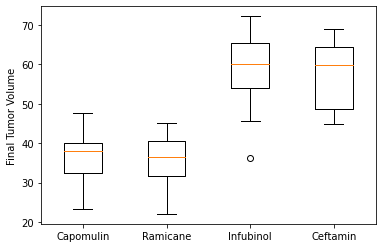

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
    
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volume_data,labels=treatments)
     
    



plt.show()

## Line and Scatter Plots

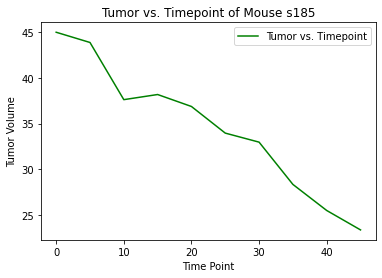

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#gets the data for only Caomulin
capomulin_df=no_duplicates_complete.loc[no_duplicates_complete["Drug Regimen"]=="Capomulin"]

capomulin_df_s185=capomulin_df.loc[capomulin_df["Mouse ID"]=="s185"]



x_axis =capomulin_df_s185["Timepoint"]

y_axis=capomulin_df_s185["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis, color="green", label="Tumor vs. Timepoint")



# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Tumor vs. Timepoint of Mouse s185")
plt.xlabel("Time Point")

plt.ylabel("Tumor Volume")


plt.show()

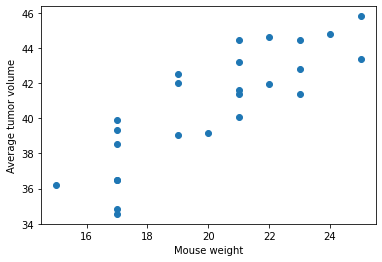

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_vol_weight=no_duplicates_complete.loc[no_duplicates_complete["Drug Regimen"]=="Capomulin"]


capomulin_vol_weight_grouped=capomulin_vol_weight.groupby("Mouse ID").mean()

capomulin_vol_weight_grouped

x_values = capomulin_vol_weight_grouped['Weight (g)']
y_values = capomulin_vol_weight_grouped['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)


plt.xlabel('Mouse weight')
plt.ylabel('Average tumor volume')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


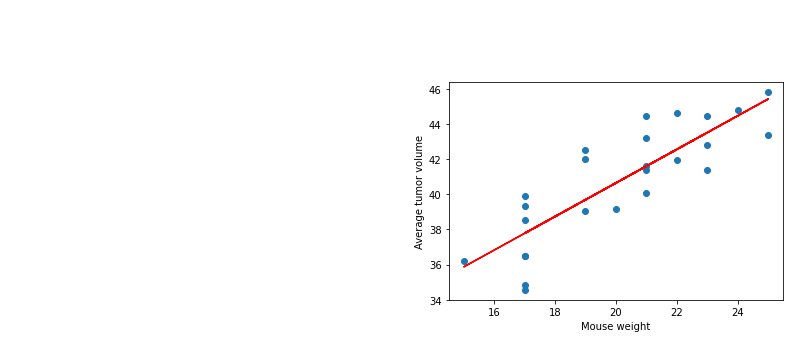

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_vol_weight_grouped['Weight (g)']
y_values = capomulin_vol_weight_grouped['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse weight')
plt.ylabel('Average tumor volume')

print(f"The r-squared is: {rvalue**2}")
plt.show()

